<a href="https://colab.research.google.com/github/saulostopa/data-science/blob/main/Identificando_imagem_via_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definindo o caminho para a pasta onde estão as imagens no Google Drive
#IMPORTANTE! Todas as imagens usadas nos códigos estão na pasta indicada abaixo

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Declarando as bibliotecas que vamos usar no Pyhton

In [27]:
import numpy as np
import cv2 as cv
import matplotlib as mpl
from matplotlib import pyplot as plot
import math

#Template Matching
Métodos de similaridade: cv.TM_CCOEFF, cv.TM_CCOEFF_NORMED, cv2.TM_CCORR,
cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED


In [47]:
# #faz upload do dataset do caracteres escrito a mão no notebook
# url_dados = "https://drive.google.com/file/d/1O5mTxHrKAS8uXyiZavw2utkuZvQl5NiV/view?usp=sharing"
# lista_de_urls = [url_dados]

# for url in lista_de_urls:
#   a = url.find ('/d/')
#   b = url.find ('/view?usp=sharing')

#   id_file = url[a+3:b]
#   print (id_file)
#   !gdown --id $id_file

In [48]:
# #faz upload do dataset do caracteres escrito a mão no notebook
# url_dados = "https://drive.google.com/file/d/1s2_9KmKG3tzsoLKta0Z7bbHQB6MRX_ZN/view?usp=sharing"
# lista_de_urls = [url_dados]

# for url in lista_de_urls:
#   a = url.find ('/d/')
#   b = url.find ('/view?usp=sharing')

#   id_file = url[a+3:b]
#   print (id_file)
#   !gdown --id $id_file

In [49]:
# img = cv.imread ('https://drive.google.com/uc?id=1s2_9KmKG3tzsoLKta0Z7bbHQB6MRX_ZN',1)

In [52]:
!wget "https://drive.google.com/drive/folders/1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing"


--2022-01-24 19:12:27--  https://drive.google.com/drive/folders/1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.193.139, 172.217.193.101, 172.217.193.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing.1’

1OPSLPq-L2m16AU1gPL     [  <=>               ] 249.76K  1.04MB/s    in 0.2s    

2022-01-24 19:12:27 (1.04 MB/s) - ‘1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing.1’ saved [255750]



In [54]:
!ls

'1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing'
'1OPSLPq-L2m16AU1gPLd5kYvWNmkqDXDw?usp=sharing.1'
 A_mac_01.jpg
 drive
 sample_data
 T_mac.jpg
'uc?id=1O5mTxHrKAS8uXyiZavw2utkuZvQl5NiV'
'uc?id=1s2_9KmKG3tzsoLKta0Z7bbHQB6MRX_ZN'


In [44]:
img = cv.imread("A_mac_01.jpg")

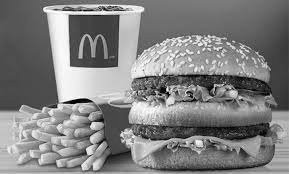

In [45]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [56]:
#Le a imagem a ser analisada e o template
A = cv.imread("A_mac_01.jpg")
T = cv.imread("T_mac.jpg")

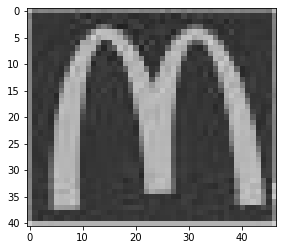

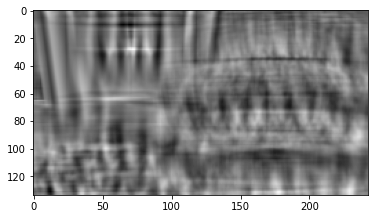

[[-0.02759375 -0.02652482 -0.03337857 ... -0.04393228 -0.04272963
  -0.03861975]
 [-0.02887449 -0.02759313 -0.0351136  ... -0.04422222 -0.04339698
  -0.03828898]
 [-0.02707205 -0.02699238 -0.03301641 ... -0.04572081 -0.04485141
  -0.03894535]
 ...
 [-0.05390498 -0.03550582 -0.02524974 ...  0.01367696  0.00869506
   0.00900551]
 [-0.03718109 -0.02016176 -0.0052785  ...  0.0438603   0.03843638
   0.03689074]
 [-0.0131831  -0.0035152   0.01119062 ...  0.04153502  0.03350246
   0.02902156]]


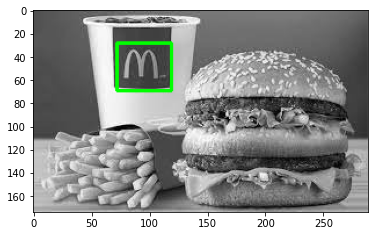

In [58]:
h = T.shape[0]
w = T.shape[1]
# Aplica template Matching
res = cv.matchTemplate(A,T,cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
# Se o método for TM_SQDIFF ou TM_SQDIFF_NORMED, top_left=min_loc
top_left = max_loc
#top_left=min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(A,top_left, bottom_right, (0,255,0), 2)
plot.imshow(T,cmap = 'gray')
plot.show()
plot.imshow(res,cmap = 'gray')
plot.show()
plot.imshow(A,cmap = 'gray')
#print(max_loc)
print(res)

#Atividade 1 - Teste Template Matching nas imagens dos brinquedos e apresente uma avaliação breve dos resultados.

In [ ]:
#testes da atividade 1 aqui

#Atividade 2 - Detectar todos os símbolos MC'Donalds ("T_mac2.jpg") na imagem "A_mac_11.jpg"

(array([  0,   0,   0, ..., 143, 143, 143]), array([  0,   1,   2, ..., 247, 248, 249]))


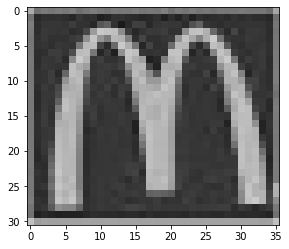

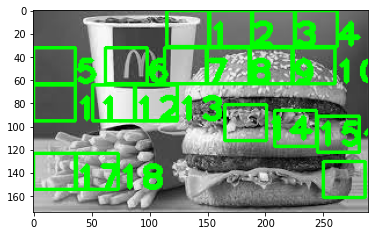

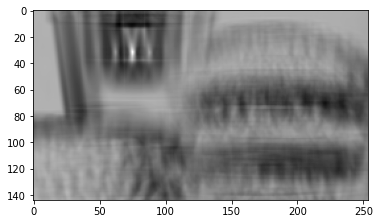

In [59]:
#Le a imagem a ser analisada e o template
A = cv.imread("A_mac_01.jpg")
A = cv.cvtColor(A,cv.COLOR_BGR2RGB)
T = cv.imread("T_mac.jpg")
T = cv.cvtColor(T,cv.COLOR_BGR2RGB)
#É preciso redimensionar (escalonar) o template
h = int(T.shape[0]/1.3)
w = int(T.shape[1]/1.3)
dim = (w,h)
T = cv.resize(T, dim, interpolation = cv.INTER_CUBIC)
# Aplica T Matching para detectar os símbolos
res = cv.matchTemplate(A,T,cv.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#print(max_val)
# Assinala os símbolos na imagem
threshold = 0.83
loc = np.where(res >= threshold)
print(loc)
top_left_ant = (0, 0)
cont=1
for i in range (len(loc[0])):
  top_left = (loc[1][i], loc[0][i])
  bottom_right = (top_left[0] + w, top_left[1] + h)
  if top_left[0] > top_left_ant[0] + w or top_left[1] > top_left_ant[1] + h :
    cv.rectangle(A,top_left, bottom_right, (0,255,0), 2)
    cv.putText(A,str(cont), bottom_right,1,2,(0,255,0),3,1)
    #cv2.putText(A, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA)
    top_left_ant = top_left
    cont = cont +1
  #print(loc[1][i], loc[0][i])
plot.imshow(T,cmap = 'gray')
plot.show()
plot.imshow(A,cmap = 'gray')
plot.show()
plot.imshow(res,cmap = 'gray')